In [1]:
import logging.config
import datetime as dt
from decimal import Decimal
import pandas as pd
import numpy as np

from app.config import settings
from app.binance_client import BinanceClient
from app.graphs import get_candles_graph

from app.trading import BollingerBandsIndicator, to_candles_df


logging.config.dictConfig(settings.LOGGING)
# pd.set_option('display.max_rows', 500)


client = await BinanceClient.init()

In [7]:
start = dt.datetime(2021, 10, 1)
end = dt.datetime(2021, 10, 18)
candles = [candle async for candle in client.get_futures_historical_candles('1000SHIBUSDT', '1h', start, end)]

len(candles)

390it [00:00, 410.94it/s]


390

In [8]:
ind = BollingerBandsIndicator()

for candle in candles:
    ind.calculate(candle)

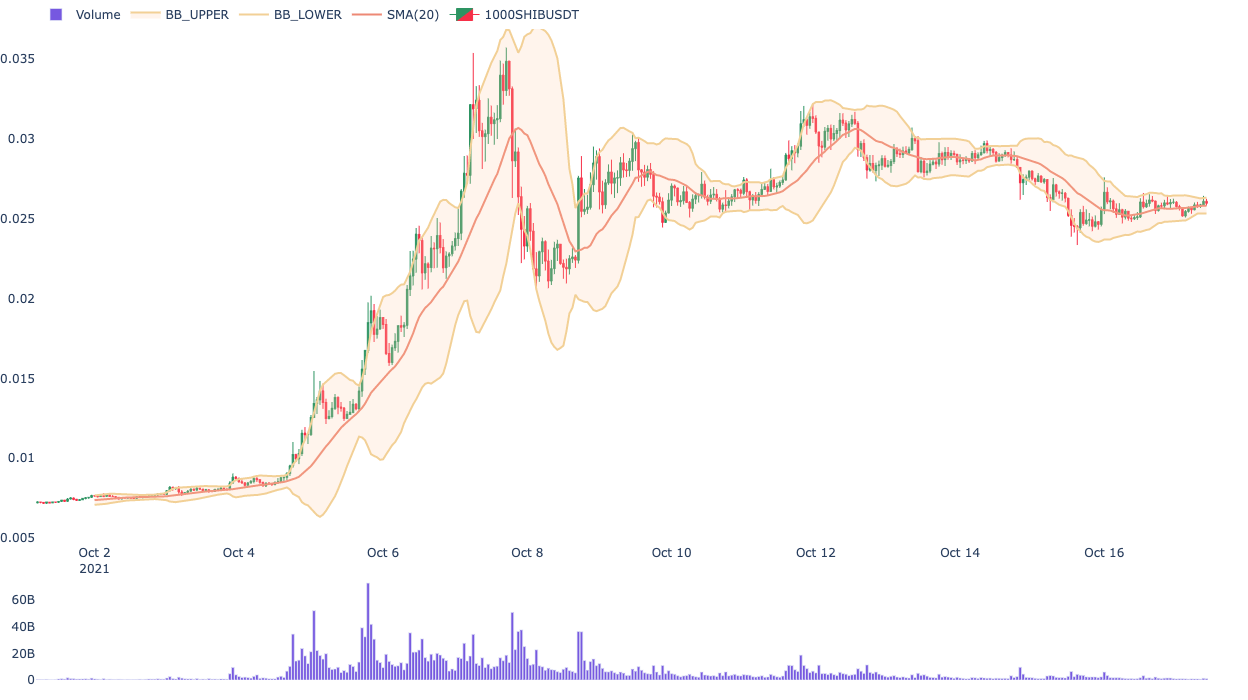

In [9]:
import plotly.graph_objects as go

graph = get_candles_graph(ticker='1000SHIBUSDT', candles=to_candles_df(candles), extra_graphs=[
    go.Scatter(x=ind.s_sma.index, y=ind.s_sma.values, name='SMA(20)', line_color='#ed8975'),
    go.Scatter(x=ind.s_lower_band.index, y=ind.s_lower_band.values, name='BB_LOWER', line_color='#f2d096'),
    go.Scatter(x=ind.s_upper_band.index, y=ind.s_upper_band.values, name='BB_UPPER', line_color='#f2d096', fill='tonexty', fillcolor='rgba(253,202,162,0.2)'),
])
graph.show()